In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [97]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

# Save the 'Id' column
train_id = train['Id']
test_id = test['Id']

# Drop 'Id' column and reset the index
train.drop('Id', axis = 1, inplace = True)
train.reset_index(drop=True, inplace=True)

test.drop('Id', axis = 1, inplace = True)
test.reset_index(drop=True, inplace=True)

# SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

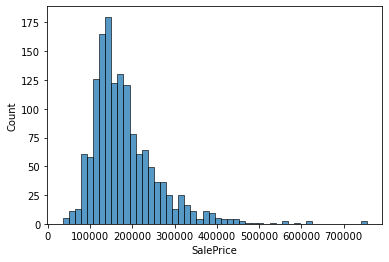

In [98]:
sns.histplot(data=train, x='SalePrice', bins=50)

In [99]:
train['SalePrice'] = np.log1p(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

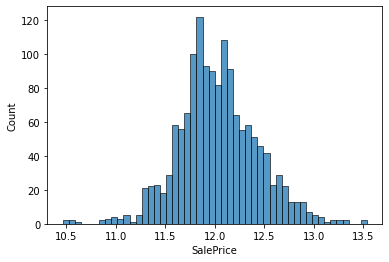

In [100]:
sns.histplot(data=train, x='SalePrice', bins=50)

# Outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

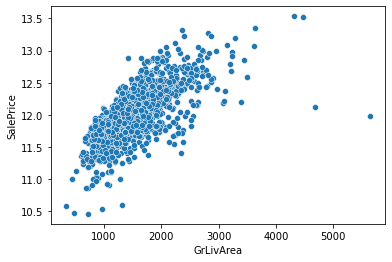

In [101]:
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')

In [102]:
train = train[train.GrLivArea < 4000]
train.shape

(1456, 80)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

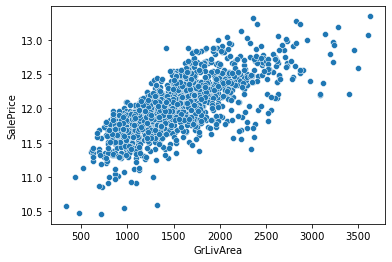

In [103]:
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')

# Missing values

In [104]:
# Number of observations each dataset
ntrain = train.shape[0]
ntest = test.shape[0]

# SalePrice
train_SalePrice = train.SalePrice

# Concatenation for data simultaneously preprocessing train and test dataset
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2915, 79)

In [105]:
missing = pd.DataFrame(all_data.isnull().sum())
missing.columns = ['Count']
missing = missing[missing.Count > 0]
missing.sort_values(by='Count', ascending=False, inplace=True)
missing['Percentage'] = missing['Count'] / all_data.shape[0] * 100
missing

,Count,Percentage
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageYrBlt,159,5.454545


In [106]:
# Drop columns which have lots of missing values
all_data.drop(labels=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [107]:
# FireplaceX : NA means "no fireplace"
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("No")
all_data.loc[:, "Fireplaces"] = all_data.loc[:, "Fireplaces"].fillna(0)

# LotFrontage : NA most likely means "no lot frontage"
all_data.loc[:, "LotFrontage"] = all_data.loc[:, "LotFrontage"].fillna(0)

# GarageX : NA most likely means "no garage"
all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("No")
all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("No")
all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("No")
all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("No")
all_data.loc[:, "GarageArea"] = all_data.loc[:, "GarageArea"].fillna(0)
all_data.loc[:, "GarageCars"] = all_data.loc[:, "GarageCars"].fillna(0)
all_data.loc[:, "GarageYrBlt"] = all_data.loc[:, "GarageYrBlt"].fillna(0)

# BsmtX : NA most likely means "no basement"
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("No")
all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("No")
all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("No")
all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("No")
all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("No")
all_data.loc[:, "BsmtUnfSF"] = all_data.loc[:, "BsmtUnfSF"].fillna(0)
all_data.loc[:, "BsmtFinSF1"] = all_data.loc[:, "BsmtFinSF1"].fillna(0)
all_data.loc[:, "BsmtFinSF2"] = all_data.loc[:, "BsmtFinSF2"].fillna(0)
all_data.loc[:, "TotalBsmtSF"] = all_data.loc[:, "TotalBsmtSF"].fillna(0)

# BsmtXBath : NA most likely means "no bath at the basement"
all_data.loc[:, "BsmtFullBath"] = all_data.loc[:, "BsmtFullBath"].fillna(0)
all_data.loc[:, "BsmtHalfBath"] = all_data.loc[:, "BsmtHalfBath"].fillna(0)

# MasVnrType : NA most likely means "no veneer"
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("No")
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)

# MSZoning : NA most likely means "can not collect this value"
all_data.loc[:, 'MSZoning'] = all_data.loc[:, 'MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Electrical : NA most likely means "can not collect this value"
all_data.loc[:, 'Electrical'] = all_data.loc[:, 'Electrical'].fillna(all_data['Electrical'].mode()[0])

# Functional: data description says NA means "typical"
all_data.loc[:, "Functional"] = all_data.loc[:, "Functional"].fillna("Typ")

# Utilities : NA most likely means "can not collect this value"
all_data.loc[:, 'Utilities'] = all_data.loc[:, 'Utilities'].fillna(all_data['Utilities'].mode()[0])

# KitchenQual : NA most likely means "can not collect this value"
all_data.loc[:, "KitchenQual"] = all_data.loc[:, "KitchenQual"].fillna(all_data['KitchenQual'].mode()[0])

# SaleType : NA most likely means "can not collect this value"
all_data.loc[:, "SaleType"] = all_data.loc[:, "SaleType"].fillna(all_data['SaleType'].mode()[0])

# ExteriorX : NA most likely means "can not collect this value"
all_data.loc[:, "Exterior1st"] = all_data.loc[:, "Exterior1st"].fillna(all_data['Exterior1st'].mode()[0])
all_data.loc[:, "Exterior2nd"] = all_data.loc[:, "Exterior2nd"].fillna(all_data['Exterior2nd'].mode()[0])

In [108]:
all_data.isnull().sum().sum()

0

# Making new features

## Train dataset

In [109]:
train.corr().loc[:, ["SalePrice"]].sort_values(by=['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.819240
GrLivArea,0.718844
GarageCars,0.680408
GarageArea,0.655212
TotalBsmtSF,0.641553
1stFlrSF,0.613742
FullBath,0.590919
YearBuilt,0.588977
YearRemodAdd,0.568986


In [110]:
# Total SF for living area
train["AllLivSF"] = train['1stFlrSF'] + train['2ndFlrSF']  + train["TotalBsmtSF"]
all_data["AllLivSF"] = all_data['1stFlrSF'] + all_data['2ndFlrSF']  + all_data["TotalBsmtSF"]

# Total SF for house
train["AllSF"] = train["AllLivSF"] + train["OpenPorchSF"] + train["EnclosedPorch"] + train["3SsnPorch"] + train["ScreenPorch"] \
    + train['GarageArea'] + train['MasVnrArea'] + train['PoolArea']
all_data["AllSF"] = all_data["AllLivSF"] + all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + all_data["3SsnPorch"] \
    + all_data["ScreenPorch"] + all_data['GarageArea'] + all_data['MasVnrArea'] + all_data['PoolArea']

# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
        train["FullBath"] + (0.5 * train["HalfBath"])
all_data["TotalBath"] = all_data["BsmtFullBath"] + (0.5 * all_data["BsmtHalfBath"]) + \
        all_data["FullBath"] + (0.5 * all_data["HalfBath"])

In [111]:
train.corr().loc[:, ["SalePrice"]].sort_values(by=['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
AllSF,0.846940
AllLivSF,0.822029
OverallQual,0.819240
GrLivArea,0.718844
GarageCars,0.680408
TotalBath,0.672929
GarageArea,0.655212
TotalBsmtSF,0.641553
1stFlrSF,0.613742


In [112]:
# train.drop(labels=['1stFlrSF', '2ndFlrSF', "OpenPorchSF", "EnclosedPorch", "BsmtFinSF2", "BsmtFinSF1", 
#                   "3SsnPorch", "ScreenPorch", 'GarageArea', 'MasVnrArea', 'PoolArea', 'GrLivArea', 
#                   "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1, inplace=True)

# Categorical data

In [113]:
# Transforming some numerical variables that are really categorical

# MSSubClass
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [114]:
# Categorical columns
cat_cols = all_data.select_dtypes(exclude=('int64', 'float64')).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [115]:
# Ordered Categorical columns
ordered_cat_cols = ['MSSubClass', 'Street', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                    'GarageCond', 'MoSold', 'YrSold']

for col in ordered_cat_cols:
    encoder = LabelEncoder()
    encoder.fit(all_data[col])
    all_data[col] = encoder.transform(all_data[col])

In [116]:
# Unordered Categorical columns
all_data = pd.get_dummies(all_data)

In [117]:
all_data.shape

(2915, 220)

# Get the final data

In [118]:
final_train = all_data[:ntrain]
final_test = all_data[ntrain:]

final_train.reset_index(inplace=True, drop=True)
final_test.reset_index(inplace=True, drop=True)

In [119]:
train_SalePrice.reset_index(inplace=True, drop=True)
final_train['SalePrice'] = train_SalePrice

<ipython-input-119-6263e0cfe3b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train['SalePrice'] = train_SalePrice


In [120]:
final_test['Id'] = test_id

<ipython-input-120-6a12133668d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test['Id'] = test_id


In [121]:
final_train.shape

(1456, 221)

In [122]:
final_test.shape

(1459, 221)

In [123]:
final_train.to_csv('cleaned_train.csv')
final_test.to_csv('cleaned_test.csv')